In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

load_dotenv()


True

In [12]:
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine, text

load_dotenv()

engine = create_engine(
    f"postgresql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}"
    f"@{os.getenv('DB_HOST')}:{os.getenv('DB_PORT')}/{os.getenv('DB_NAME')}"
)

with engine.connect() as conn:
    print(conn.execute(text("SELECT 1")).scalar())




1


In [15]:
import pandas as pd
from sqlalchemy import text

with engine.connect() as conn:
    df_top_games = pd.read_sql(text("SELECT * FROM analytics.top_games"), conn)
    df_platform = pd.read_sql(text("SELECT * FROM analytics.sales_by_platform"), conn)
    df_genre = pd.read_sql(text("SELECT * FROM analytics.sales_by_genre"), conn)
    df_decade = pd.read_sql(text("SELECT * FROM analytics.sales_by_decade"), conn)
    df_publishers = pd.read_sql(text("SELECT * FROM analytics.top_publishers"), conn)
    df_regional = pd.read_sql(text("SELECT * FROM analytics.regional_analysis"), conn)


In [16]:
df_top_games.head()


,game_id,Name,Platform,Year,Genre,Publisher,Global_Sales,Sales_Category
0,1,Wii Sports,Wii,2006,Sports,Nintendo,82.74,Blockbuster
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24,Blockbuster
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.82,Blockbuster
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.00,Blockbuster
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31.37,Blockbuster


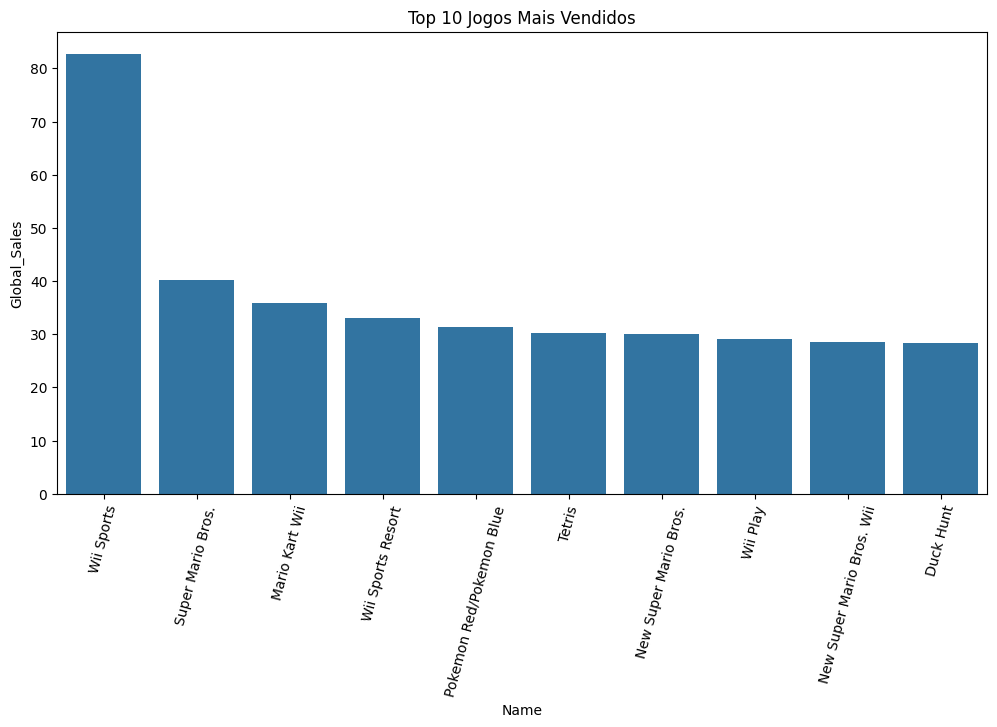

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,6))
sns.barplot(data=df_top_games, x="Name", y="Global_Sales")
plt.xticks(rotation=75)
plt.title("Top 10 Jogos Mais Vendidos")
plt.show()


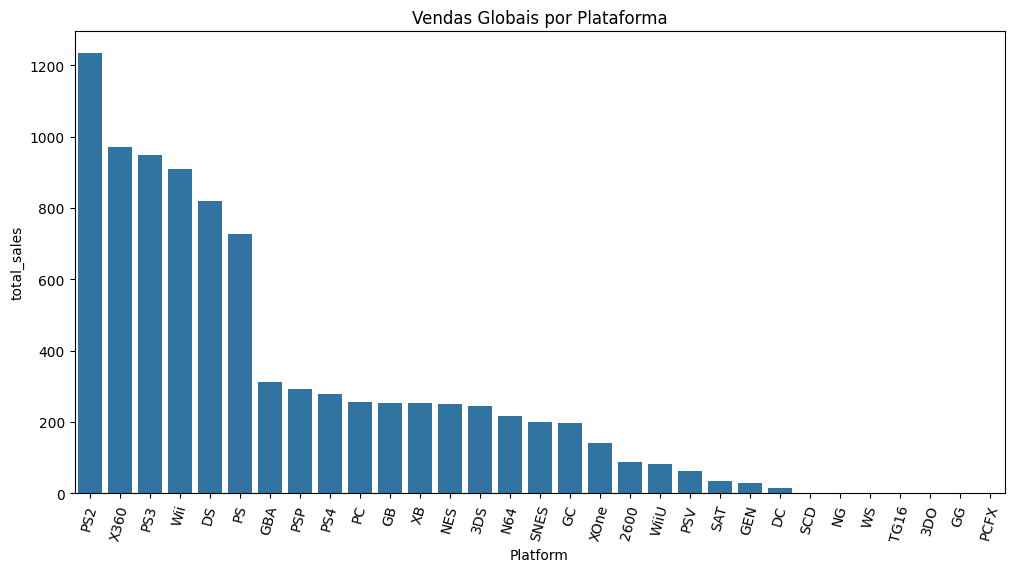

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_platform, x="Platform", y="total_sales")
plt.xticks(rotation=75)
plt.title("Vendas Globais por Plataforma")
plt.show()


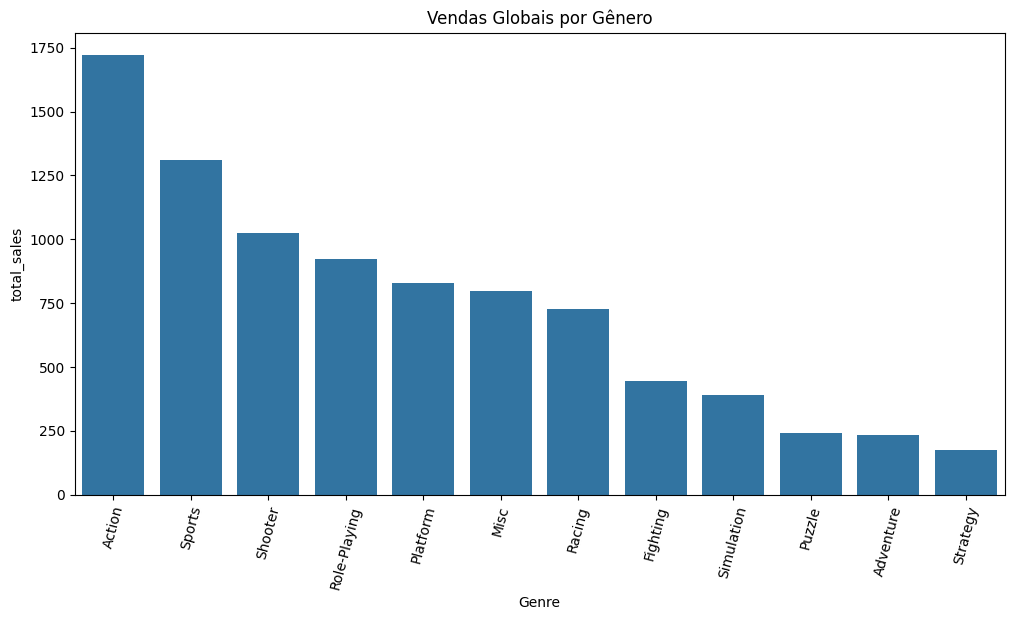

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_genre, x="Genre", y="total_sales")
plt.xticks(rotation=75)
plt.title("Vendas Globais por Gênero")
plt.show()
